##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic text classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/text_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates text classification starting from plain text files stored on disk. You'll train a binary classifier to perform sentiment analysis on an IMDB dataset. At the end of the notebook, there is an exercise for you to try, in which you'll train a multiclass classifier to predict the tag for a programming question on Stack Overflow.


In [3]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [4]:
print(tf.__version__)

2.4.0


## Sentiment analysis

This notebook trains a sentiment analysis model to classify movie reviews as *positive* or *negative*, based on the text of the review. This is an example of *binary*—or two-class—classification, an important and widely applicable kind of machine learning problem.

You'll use the [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/) that contains the text of 50,000 movie reviews from the [Internet Movie Database](https://www.imdb.com/). These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are *balanced*, meaning they contain an equal number of positive and negative reviews.


### Download and explore the IMDB dataset

Let's download and extract the dataset, then explore the directory structure.

In [5]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

    8192/84125825 [..............................] - ETA: 22:59

   24576/84125825 [..............................] - ETA: 15:20

   40960/84125825 [..............................] - ETA: 13:48

   73728/84125825 [..............................] - ETA: 10:13

   90112/84125825 [..............................] - ETA: 10:27

  106496/84125825 [..............................] - ETA: 10:36

  139264/84125825 [..............................] - ETA: 9:27 

  172032/84125825 [..............................] - ETA: 8:45

  204800/84125825 [..............................] - ETA: 8:16

  253952/84125825 [..............................] - ETA: 7:24

  319488/84125825 [..............................] - ETA: 6:28

  368640/84125825 [..............................] - ETA: 6:06

  450560/84125825 [..............................] - ETA: 5:24

  532480/84125825 [..............................] - ETA: 4:55

  630784/84125825 [..............................] - ETA: 4:27

  745472/84125825 [..............................] - ETA: 4:00

  860160/84125825 [..............................] - ETA: 3:41

  991232/84125825 [..............................] - ETA: 3:23

 1155072/84125825 [..............................] - ETA: 3:03

 1318912/84125825 [..............................] - ETA: 2:48

 1499136/84125825 [..............................] - ETA: 2:35

 1695744/84125825 [..............................] - ETA: 2:21

 1712128/84125825 [..............................] - ETA: 2:22

 1925120/84125825 [..............................] - ETA: 2:12

 2187264/84125825 [..............................] - ETA: 2:00

 2465792/84125825 [..............................] - ETA: 1:49

 2482176/84125825 [..............................] - ETA: 1:50

 2777088/84125825 [..............................] - ETA: 1:40

 2793472/84125825 [..............................] - ETA: 1:41

 3137536/84125825 [>.............................] - ETA: 1:33

 3563520/84125825 [>.............................] - ETA: 1:23

 3579904/84125825 [>.............................] - ETA: 1:24

 4055040/84125825 [>.............................] - ETA: 1:15

 4071424/84125825 [>.............................] - ETA: 1:16

 4612096/84125825 [>.............................] - ETA: 1:08

 4644864/84125825 [>.............................] - ETA: 1:09

 5283840/84125825 [>.............................] - ETA: 1:01

 5300224/84125825 [>.............................] - ETA: 1:02

 6053888/84125825 [=>............................] - ETA: 54s 

 6086656/84125825 [=>............................] - ETA: 55s

 6955008/84125825 [=>............................] - ETA: 48s

 6971392/84125825 [=>............................] - ETA: 49s

 7987200/84125825 [=>............................] - ETA: 43s

 8019968/84125825 [=>............................] - ETA: 43s

 9216000/84125825 [==>...........................] - ETA: 37s

 9265152/84125825 [==>...........................] - ETA: 38s

10690560/84125825 [==>...........................] - ETA: 32s

10723328/84125825 [==>...........................] - ETA: 33s

12460032/84125825 [===>..........................] - ETA: 28s

12509184/84125825 [===>..........................] - ETA: 28s

14573568/84125825 [====>.........................] - ETA: 24s

14622720/84125825 [====>.........................] - ETA: 24s

17080320/84125825 [=====>........................] - ETA: 20s

17145856/84125825 [=====>........................] - ETA: 20s

19849216/84125825 [======>.......................] - ETA: 17s

19931136/84125825 [======>.......................] - ETA: 17s

22831104/84125825 [=======>......................] - ETA: 14s

22913024/84125825 [=======>......................] - ETA: 14s

24993792/84125825 [=======>......................] - ETA: 13s

25075712/84125825 [=======>......................] - ETA: 13s

28106752/84125825 [=========>....................] - ETA: 11s

28188672/84125825 [=========>....................] - ETA: 11s

31088640/84125825 [==========>...................] - ETA: 10s

31186944/84125825 [==========>...................] - ETA: 10s

34234368/84125825 [===========>..................] - ETA: 8s 

34283520/84125825 [===========>..................] - ETA: 8s

36814848/84125825 [============>.................] - ETA: 7s

37052416/84125825 [============>.................] - ETA: 7s

38985728/84125825 [============>.................] - ETA: 7s

40132608/84125825 [=============>................] - ETA: 6s

41738240/84125825 [=============>................] - ETA: 6s

43245568/84125825 [==============>...............] - ETA: 6s

44408832/84125825 [==============>...............] - ETA: 5s

45932544/84125825 [===============>..............] - ETA: 5s

47259648/84125825 [===============>..............] - ETA: 5s

48701440/84125825 [================>.............] - ETA: 4s

49963008/84125825 [================>.............] - ETA: 4s

51650560/84125825 [=================>............] - ETA: 4s

52715520/84125825 [=================>............] - ETA: 4s

54353920/84125825 [==================>...........] - ETA: 3s

56156160/84125825 [===================>..........] - ETA: 3s

57253888/84125825 [===================>..........] - ETA: 3s

58777600/84125825 [===================>..........] - ETA: 3s

59842560/84125825 [====================>.........] - ETA: 2s

61186048/84125825 [====================>.........] - ETA: 2s

62529536/84125825 [=====================>........] - ETA: 2s

64184320/84125825 [=====================>........] - ETA: 2s

65396736/84125825 [======================>.......] - ETA: 2s

66969600/84125825 [======================>.......] - ETA: 1s

68231168/84125825 [=======================>......] - ETA: 1s

69697536/84125825 [=======================>......] - ETA: 1s

70787072/84125825 [========================>.....] - ETA: 1s

72359936/84125825 [========================>.....] - ETA: 1s

73572352/84125825 [=========================>....] - ETA: 1s

75227136/84125825 [=========================>....] - ETA: 0s

76685312/84125825 [==========================>...] - ETA: 0s

77586432/84125825 [==========================>...] - ETA: 0s

79454208/84125825 [===========================>..] - ETA: 0s

80715776/84125825 [===========================>..] - ETA: 0s

82436096/84125825 [============================>.] - ETA: 0s

83468288/84125825 [============================>.] - ETA: 0s

84131840/84125825 [==============================] - 8s 0us/step


In [6]:
os.listdir(dataset_dir)

['README', 'train', 'imdbEr.txt', 'test', 'imdb.vocab']

In [7]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['unsup',
 'labeledBow.feat',
 'neg',
 'urls_neg.txt',
 'unsupBow.feat',
 'pos',
 'urls_pos.txt',
 'urls_unsup.txt']

The `aclImdb/train/pos` and `aclImdb/train/neg` directories contain many text files, each of which is a single movie review. Let's take a look at one of them.

In [8]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


### Load the dataset

Next, you will load the data off disk and prepare it into a format suitable for training. To do so, you will use the helpful [text_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text_dataset_from_directory) utility, which expects a directory structure as follows.

```
main_directory/
...class_a/
......a_text_1.txt
......a_text_2.txt
...class_b/
......b_text_1.txt
......b_text_2.txt
```

To prepare a dataset for binary classification, you will need two folders on disk, corresponding to `class_a` and `class_b`. These will be the positive and negative movie reviews, which can be found in  `aclImdb/train/pos` and `aclImdb/train/neg`. As the IMDB dataset contains additional folders, you will remove them before using this utility.

In [9]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

Next, you will use the `text_dataset_from_directory` utility to create a labeled `tf.data.Dataset`. [tf.data](https://www.tensorflow.org/guide/data) is a powerful collection of tools for working with data. 

When running a machine learning experiment, it is a best practice to divide your dataset into three splits: [train](https://developers.google.com/machine-learning/glossary#training_set), [validation](https://developers.google.com/machine-learning/glossary#validation_set), and [test](https://developers.google.com/machine-learning/glossary#test-set). 

The IMDB dataset has already been divided into train and test, but it lacks a validation set. Let's create a validation set using an 80:20 split of the training data by using the `validation_split` argument below.

In [10]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


As you can see above, there are 25,000 examples in the training folder, of which you will use 80% (or 20,000) for training. As you will see in a moment, you can train a model by passing a dataset directly to `model.fit`. If you're new to `tf.data`, you can also iterate over the dataset and print out a few examples as follows.

In [11]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

Notice the reviews contain raw text (with punctuation and occasional HTML tags like `<br/>`). You will show how to handle these in the following section. 

The labels are 0 or 1. To see which of these correspond to positive and negative movie reviews, you can check the `class_names` property on the dataset.


In [12]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


Next, you will create a validation and test dataset. You will use the remaining 5,000 reviews from the training set for validation.

Note:  When using the `validation_split` and `subset` arguments, make sure to either specify a random seed, or to pass `shuffle=False`, so that the validation and training splits have no overlap.

In [13]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [14]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


Note: The Preprocessing APIs used in the following section are experimental in TensorFlow 2.3 and subject to change.

### Prepare the dataset for training

Next, you will standardize, tokenize, and vectorize the data using the helpful `preprocessing.TextVectorization` layer. 

Standardization refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset. Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words, by splitting on whitespace). Vectorization refers to converting tokens into numbers so they can be fed into a neural network. All of these tasks can be accomplished with this layer.

As you saw above, the reviews contain various HTML tags like `<br />`. These tags will not be removed by the default standardizer in the `TextVectorization` layer (which converts text to lowercase and strips punctuation by default, but doesn't strip HTML). You will write a custom standardization function to remove the HTML.

Note: to prevent [train/test skew](https://developers.google.com/machine-learning/guides/rules-of-ml#training-serving_skew) (also know as train/serving skew), it is important to preprocess the data identically at train and test time. To facilitate this, the `TextVectorization` layer can be included directly inside your model, as shown later in this tutorial.

In [15]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

Next, you will create a `TextVectorization` layer. you will use this layer to standardize, tokenize, and vectorize our data. You set the `output_mode` to `int` to create unique integer indices for each token.

Note that you're using the default split function, and the custom standardization function you defined above. You'll also define some constants for the model, like an explicit maximum `sequence_length`, which will cause the layer to pad or truncate sequences to exactly `sequence_length` values.

In [16]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

Next, you will call `adapt` to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.

Note: it's important to only use your training data when calling adapt (using the test set would leak information).

In [17]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

Let's create a function to see the result of using this layer to preprocess some data.

In [18]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [19]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />T

As you can see above, each token has been replaced by an integer. You can lookup the token (string) that each integer corresponds to by calling `.get_vocabulary()` on the layer.

In [20]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


You are nearly ready to train your model. As a final preprocessing step, you will apply the TextVectorization layer you created earlier to the train, validation, and test dataset.

In [21]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

### Configure the dataset for performance

These are two important methods you should use when loading data to make sure that I/O does not become blocking.

`.cache()` keeps data in memory after it's loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

`.prefetch()` overlaps data preprocessing and model execution while training. 

You can learn more about both methods, as well as how to cache data to disk in the [data performance guide](https://www.tensorflow.org/guide/data_performance).

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

It's time to create our neural network:

In [23]:
embedding_dim = 16

In [24]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


The layers are stacked sequentially to build the classifier:

1. The first layer is an `Embedding` layer. This layer takes the integer-encoded reviews and looks up an embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: `(batch, sequence, embedding)`.  To learn more about embeddings, see the [word embedding tutorial](../text/word_embeddings.ipynb).
2. Next, a `GlobalAveragePooling1D` layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
3. This fixed-length output vector is piped through a fully-connected (`Dense`) layer with 16 hidden units. 
4. The last layer is densely connected with a single output node.

### Loss function and optimizer

A model needs a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs a probability (a single-unit layer with a sigmoid activation), you'll use `losses.BinaryCrossentropy` loss function.

Now, configure the model to use an optimizer and a loss function:

In [25]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

### Train the model

You will train the model by passing the `dataset` object to the fit method.

In [26]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10


  1/625 [..............................] - ETA: 9:56 - loss: 0.6948 - binary_accuracy: 0.4375

 12/625 [..............................] - ETA: 2s - loss: 0.6935 - binary_accuracy: 0.4780  

 24/625 [>.............................] - ETA: 2s - loss: 0.6930 - binary_accuracy: 0.5037

 36/625 [>.............................] - ETA: 2s - loss: 0.6928 - binary_accuracy: 0.5141

 48/625 [=>............................] - ETA: 2s - loss: 0.6927 - binary_accuracy: 0.5198

 59/625 [=>............................] - ETA: 2s - loss: 0.6926 - binary_accuracy: 0.5243

 71/625 [==>...........................] - ETA: 2s - loss: 0.6924 - binary_accuracy: 0.5280

 83/625 [==>...........................] - ETA: 2s - loss: 0.6923 - binary_accuracy: 0.5306

 94/625 [===>..........................] - ETA: 2s - loss: 0.6921 - binary_accuracy: 0.5317

106/625 [====>.........................] - ETA: 2s - loss: 0.6920 - binary_accuracy: 0.5319

118/625 [====>.........................] - ETA: 2s - loss: 0.6918 - binary_accuracy: 0.5323

130/625 [=====>........................] - ETA: 2s - loss: 0.6917 - binary_accuracy: 0.5334

142/625 [=====>........................] - ETA: 2s - loss: 0.6916 - binary_accuracy: 0.5352

154/625 [======>.......................] - ETA: 2s - loss: 0.6914 - binary_accuracy: 0.5377

166/625 [======>.......................] - ETA: 2s - loss: 0.6913 - binary_accuracy: 0.5405

179/625 [=======>......................] - ETA: 1s - loss: 0.6911 - binary_accuracy: 0.5438

190/625 [========>.....................] - ETA: 1s - loss: 0.6910 - binary_accuracy: 0.5465

202/625 [========>.....................] - ETA: 1s - loss: 0.6908 - binary_accuracy: 0.5492

214/625 [=========>....................] - ETA: 1s - loss: 0.6907 - binary_accuracy: 0.5518

226/625 [=========>....................] - ETA: 1s - loss: 0.6905 - binary_accuracy: 0.5545

238/625 [==========>...................] - ETA: 1s - loss: 0.6903 - binary_accuracy: 0.5573

250/625 [===========>..................] - ETA: 1s - loss: 0.6901 - binary_accuracy: 0.5600

262/625 [===========>..................] - ETA: 1s - loss: 0.6899 - binary_accuracy: 0.5628

274/625 [============>.................] - ETA: 1s - loss: 0.6897 - binary_accuracy: 0.5655

286/625 [============>.................] - ETA: 1s - loss: 0.6895 - binary_accuracy: 0.5681

297/625 [=============>................] - ETA: 1s - loss: 0.6893 - binary_accuracy: 0.5705

309/625 [=============>................] - ETA: 1s - loss: 0.6891 - binary_accuracy: 0.5730

321/625 [==============>...............] - ETA: 1s - loss: 0.6888 - binary_accuracy: 0.5754

333/625 [==============>...............] - ETA: 1s - loss: 0.6886 - binary_accuracy: 0.5777

345/625 [===============>..............] - ETA: 1s - loss: 0.6884 - binary_accuracy: 0.5799

357/625 [================>.............] - ETA: 1s - loss: 0.6881 - binary_accuracy: 0.5821

369/625 [================>.............] - ETA: 1s - loss: 0.6879 - binary_accuracy: 0.5842

381/625 [=================>............] - ETA: 1s - loss: 0.6876 - binary_accuracy: 0.5863

393/625 [=================>............] - ETA: 1s - loss: 0.6874 - binary_accuracy: 0.5884

405/625 [==================>...........] - ETA: 0s - loss: 0.6871 - binary_accuracy: 0.5904

417/625 [===================>..........] - ETA: 0s - loss: 0.6868 - binary_accuracy: 0.5925

428/625 [===================>..........] - ETA: 0s - loss: 0.6866 - binary_accuracy: 0.5943

440/625 [====================>.........] - ETA: 0s - loss: 0.6863 - binary_accuracy: 0.5962

452/625 [====================>.........] - ETA: 0s - loss: 0.6860 - binary_accuracy: 0.5981

464/625 [=====================>........] - ETA: 0s - loss: 0.6857 - binary_accuracy: 0.6000

476/625 [=====================>........] - ETA: 0s - loss: 0.6854 - binary_accuracy: 0.6018

488/625 [======================>.......] - ETA: 0s - loss: 0.6851 - binary_accuracy: 0.6036

501/625 [=======================>......] - ETA: 0s - loss: 0.6847 - binary_accuracy: 0.6055

513/625 [=======================>......] - ETA: 0s - loss: 0.6844 - binary_accuracy: 0.6072

525/625 [========================>.....] - ETA: 0s - loss: 0.6841 - binary_accuracy: 0.6089

537/625 [========================>.....] - ETA: 0s - loss: 0.6838 - binary_accuracy: 0.6105

549/625 [=========================>....] - ETA: 0s - loss: 0.6834 - binary_accuracy: 0.6121

561/625 [=========================>....] - ETA: 0s - loss: 0.6831 - binary_accuracy: 0.6137

573/625 [==========================>...] - ETA: 0s - loss: 0.6827 - binary_accuracy: 0.6152

584/625 [===========================>..] - ETA: 0s - loss: 0.6824 - binary_accuracy: 0.6166

596/625 [===========================>..] - ETA: 0s - loss: 0.6820 - binary_accuracy: 0.6181

608/625 [============================>.] - ETA: 0s - loss: 0.6817 - binary_accuracy: 0.6196

620/625 [============================>.] - ETA: 0s - loss: 0.6813 - binary_accuracy: 0.6210

625/625 [==============================] - 5s 6ms/step - loss: 0.6811 - binary_accuracy: 0.6217 - val_loss: 0.6113 - val_binary_accuracy: 0.7764


Epoch 2/10
  1/625 [..............................] - ETA: 2s - loss: 0.6147 - binary_accuracy: 0.7812

 14/625 [..............................] - ETA: 2s - loss: 0.6048 - binary_accuracy: 0.7899

 27/625 [>.............................] - ETA: 2s - loss: 0.6055 - binary_accuracy: 0.7868

 40/625 [>.............................] - ETA: 2s - loss: 0.6060 - binary_accuracy: 0.7831

 53/625 [=>............................] - ETA: 2s - loss: 0.6057 - binary_accuracy: 0.7820

 66/625 [==>...........................] - ETA: 2s - loss: 0.6051 - binary_accuracy: 0.7810

 79/625 [==>...........................] - ETA: 2s - loss: 0.6046 - binary_accuracy: 0.7804

 92/625 [===>..........................] - ETA: 2s - loss: 0.6039 - binary_accuracy: 0.7801

106/625 [====>.........................] - ETA: 2s - loss: 0.6031 - binary_accuracy: 0.7803

120/625 [====>.........................] - ETA: 1s - loss: 0.6024 - binary_accuracy: 0.7807

133/625 [=====>........................] - ETA: 1s - loss: 0.6017 - binary_accuracy: 0.7809

146/625 [======>.......................] - ETA: 1s - loss: 0.6010 - binary_accuracy: 0.7809

159/625 [======>.......................] - ETA: 1s - loss: 0.6004 - binary_accuracy: 0.7810

173/625 [=======>......................] - ETA: 1s - loss: 0.5997 - binary_accuracy: 0.7811

186/625 [=======>......................] - ETA: 1s - loss: 0.5991 - binary_accuracy: 0.7812

199/625 [========>.....................] - ETA: 1s - loss: 0.5984 - binary_accuracy: 0.7814

212/625 [=========>....................] - ETA: 1s - loss: 0.5978 - binary_accuracy: 0.7816

225/625 [=========>....................] - ETA: 1s - loss: 0.5971 - binary_accuracy: 0.7817

238/625 [==========>...................] - ETA: 1s - loss: 0.5965 - binary_accuracy: 0.7819

252/625 [===========>..................] - ETA: 1s - loss: 0.5957 - binary_accuracy: 0.7821

265/625 [===========>..................] - ETA: 1s - loss: 0.5950 - binary_accuracy: 0.7824

279/625 [============>.................] - ETA: 1s - loss: 0.5942 - binary_accuracy: 0.7827

293/625 [=============>................] - ETA: 1s - loss: 0.5935 - binary_accuracy: 0.7831

307/625 [=============>................] - ETA: 1s - loss: 0.5927 - binary_accuracy: 0.7833

320/625 [==============>...............] - ETA: 1s - loss: 0.5921 - binary_accuracy: 0.7835

334/625 [===============>..............] - ETA: 1s - loss: 0.5914 - binary_accuracy: 0.7837

347/625 [===============>..............] - ETA: 1s - loss: 0.5907 - binary_accuracy: 0.7839

360/625 [================>.............] - ETA: 1s - loss: 0.5901 - binary_accuracy: 0.7841

374/625 [================>.............] - ETA: 0s - loss: 0.5894 - binary_accuracy: 0.7844

388/625 [=================>............] - ETA: 0s - loss: 0.5887 - binary_accuracy: 0.7847

401/625 [==================>...........] - ETA: 0s - loss: 0.5880 - binary_accuracy: 0.7850

414/625 [==================>...........] - ETA: 0s - loss: 0.5873 - binary_accuracy: 0.7853

428/625 [===================>..........] - ETA: 0s - loss: 0.5865 - binary_accuracy: 0.7856

442/625 [====================>.........] - ETA: 0s - loss: 0.5858 - binary_accuracy: 0.7859

455/625 [====================>.........] - ETA: 0s - loss: 0.5851 - binary_accuracy: 0.7862

468/625 [=====================>........] - ETA: 0s - loss: 0.5844 - binary_accuracy: 0.7865

481/625 [======================>.......] - ETA: 0s - loss: 0.5838 - binary_accuracy: 0.7868

494/625 [======================>.......] - ETA: 0s - loss: 0.5831 - binary_accuracy: 0.7871

508/625 [=======================>......] - ETA: 0s - loss: 0.5824 - binary_accuracy: 0.7875

522/625 [========================>.....] - ETA: 0s - loss: 0.5816 - binary_accuracy: 0.7878

536/625 [========================>.....] - ETA: 0s - loss: 0.5809 - binary_accuracy: 0.7882

550/625 [=========================>....] - ETA: 0s - loss: 0.5802 - binary_accuracy: 0.7885

564/625 [==========================>...] - ETA: 0s - loss: 0.5795 - binary_accuracy: 0.7889

578/625 [==========================>...] - ETA: 0s - loss: 0.5787 - binary_accuracy: 0.7892

591/625 [===========================>..] - ETA: 0s - loss: 0.5781 - binary_accuracy: 0.7895

605/625 [============================>.] - ETA: 0s - loss: 0.5774 - binary_accuracy: 0.7898

619/625 [============================>.] - ETA: 0s - loss: 0.5767 - binary_accuracy: 0.7902

625/625 [==============================] - 3s 4ms/step - loss: 0.5763 - binary_accuracy: 0.7903 - val_loss: 0.4955 - val_binary_accuracy: 0.8230


Epoch 3/10
  1/625 [..............................] - ETA: 2s - loss: 0.5043 - binary_accuracy: 0.8125

 15/625 [..............................] - ETA: 2s - loss: 0.4900 - binary_accuracy: 0.8472

 28/625 [>.............................] - ETA: 2s - loss: 0.4877 - binary_accuracy: 0.8404

 42/625 [=>............................] - ETA: 2s - loss: 0.4870 - binary_accuracy: 0.8361

 56/625 [=>............................] - ETA: 2s - loss: 0.4859 - binary_accuracy: 0.8348

 70/625 [==>...........................] - ETA: 2s - loss: 0.4852 - binary_accuracy: 0.8336

 84/625 [===>..........................] - ETA: 2s - loss: 0.4846 - binary_accuracy: 0.8329

 97/625 [===>..........................] - ETA: 2s - loss: 0.4840 - binary_accuracy: 0.8327

111/625 [====>.........................] - ETA: 1s - loss: 0.4832 - binary_accuracy: 0.8329

125/625 [=====>........................] - ETA: 1s - loss: 0.4825 - binary_accuracy: 0.8328

139/625 [=====>........................] - ETA: 1s - loss: 0.4819 - binary_accuracy: 0.8325

153/625 [======>.......................] - ETA: 1s - loss: 0.4813 - binary_accuracy: 0.8323

166/625 [======>.......................] - ETA: 1s - loss: 0.4809 - binary_accuracy: 0.8320

179/625 [=======>......................] - ETA: 1s - loss: 0.4805 - binary_accuracy: 0.8320

193/625 [========>.....................] - ETA: 1s - loss: 0.4799 - binary_accuracy: 0.8321

207/625 [========>.....................] - ETA: 1s - loss: 0.4793 - binary_accuracy: 0.8321

221/625 [=========>....................] - ETA: 1s - loss: 0.4788 - binary_accuracy: 0.8322

235/625 [==========>...................] - ETA: 1s - loss: 0.4783 - binary_accuracy: 0.8324

249/625 [==========>...................] - ETA: 1s - loss: 0.4777 - binary_accuracy: 0.8326

262/625 [===========>..................] - ETA: 1s - loss: 0.4772 - binary_accuracy: 0.8328

276/625 [============>.................] - ETA: 1s - loss: 0.4766 - binary_accuracy: 0.8330

289/625 [============>.................] - ETA: 1s - loss: 0.4760 - binary_accuracy: 0.8332

303/625 [=============>................] - ETA: 1s - loss: 0.4755 - binary_accuracy: 0.8334

316/625 [==============>...............] - ETA: 1s - loss: 0.4750 - binary_accuracy: 0.8335

330/625 [==============>...............] - ETA: 1s - loss: 0.4746 - binary_accuracy: 0.8335

344/625 [===============>..............] - ETA: 1s - loss: 0.4741 - binary_accuracy: 0.8336

357/625 [================>.............] - ETA: 1s - loss: 0.4737 - binary_accuracy: 0.8337

370/625 [================>.............] - ETA: 0s - loss: 0.4732 - binary_accuracy: 0.8339

383/625 [=================>............] - ETA: 0s - loss: 0.4727 - binary_accuracy: 0.8340

396/625 [==================>...........] - ETA: 0s - loss: 0.4722 - binary_accuracy: 0.8342

409/625 [==================>...........] - ETA: 0s - loss: 0.4717 - binary_accuracy: 0.8344

422/625 [===================>..........] - ETA: 0s - loss: 0.4712 - binary_accuracy: 0.8346

435/625 [===================>..........] - ETA: 0s - loss: 0.4707 - binary_accuracy: 0.8348

448/625 [====================>.........] - ETA: 0s - loss: 0.4702 - binary_accuracy: 0.8351

461/625 [=====================>........] - ETA: 0s - loss: 0.4697 - binary_accuracy: 0.8353

474/625 [=====================>........] - ETA: 0s - loss: 0.4692 - binary_accuracy: 0.8355

487/625 [======================>.......] - ETA: 0s - loss: 0.4687 - binary_accuracy: 0.8357

500/625 [=======================>......] - ETA: 0s - loss: 0.4682 - binary_accuracy: 0.8360

513/625 [=======================>......] - ETA: 0s - loss: 0.4678 - binary_accuracy: 0.8362

527/625 [========================>.....] - ETA: 0s - loss: 0.4672 - binary_accuracy: 0.8365

541/625 [========================>.....] - ETA: 0s - loss: 0.4667 - binary_accuracy: 0.8367

555/625 [=========================>....] - ETA: 0s - loss: 0.4662 - binary_accuracy: 0.8370

568/625 [==========================>...] - ETA: 0s - loss: 0.4657 - binary_accuracy: 0.8372

582/625 [==========================>...] - ETA: 0s - loss: 0.4652 - binary_accuracy: 0.8374

595/625 [===========================>..] - ETA: 0s - loss: 0.4647 - binary_accuracy: 0.8376

608/625 [============================>.] - ETA: 0s - loss: 0.4643 - binary_accuracy: 0.8378

621/625 [============================>.] - ETA: 0s - loss: 0.4638 - binary_accuracy: 0.8380

625/625 [==============================] - 3s 4ms/step - loss: 0.4637 - binary_accuracy: 0.8381 - val_loss: 0.4184 - val_binary_accuracy: 0.8484


Epoch 4/10
  1/625 [..............................] - ETA: 2s - loss: 0.4262 - binary_accuracy: 0.8750

 14/625 [..............................] - ETA: 2s - loss: 0.4152 - binary_accuracy: 0.8662

 28/625 [>.............................] - ETA: 2s - loss: 0.4087 - binary_accuracy: 0.8639

 41/625 [>.............................] - ETA: 2s - loss: 0.4066 - binary_accuracy: 0.8615

 55/625 [=>............................] - ETA: 2s - loss: 0.4051 - binary_accuracy: 0.8610

 68/625 [==>...........................] - ETA: 2s - loss: 0.4044 - binary_accuracy: 0.8607

 82/625 [==>...........................] - ETA: 2s - loss: 0.4039 - binary_accuracy: 0.8602

 95/625 [===>..........................] - ETA: 2s - loss: 0.4036 - binary_accuracy: 0.8597

109/625 [====>.........................] - ETA: 1s - loss: 0.4031 - binary_accuracy: 0.8596

122/625 [====>.........................] - ETA: 1s - loss: 0.4026 - binary_accuracy: 0.8594

135/625 [=====>........................] - ETA: 1s - loss: 0.4022 - binary_accuracy: 0.8591

149/625 [======>.......................] - ETA: 1s - loss: 0.4018 - binary_accuracy: 0.8587

163/625 [======>.......................] - ETA: 1s - loss: 0.4015 - binary_accuracy: 0.8583

177/625 [=======>......................] - ETA: 1s - loss: 0.4012 - binary_accuracy: 0.8581

191/625 [========>.....................] - ETA: 1s - loss: 0.4008 - binary_accuracy: 0.8581

205/625 [========>.....................] - ETA: 1s - loss: 0.4004 - binary_accuracy: 0.8580

219/625 [=========>....................] - ETA: 1s - loss: 0.4001 - binary_accuracy: 0.8580

233/625 [==========>...................] - ETA: 1s - loss: 0.3998 - binary_accuracy: 0.8580

247/625 [==========>...................] - ETA: 1s - loss: 0.3995 - binary_accuracy: 0.8580

260/625 [===========>..................] - ETA: 1s - loss: 0.3991 - binary_accuracy: 0.8580

273/625 [============>.................] - ETA: 1s - loss: 0.3987 - binary_accuracy: 0.8581

286/625 [============>.................] - ETA: 1s - loss: 0.3984 - binary_accuracy: 0.8581

300/625 [=============>................] - ETA: 1s - loss: 0.3980 - binary_accuracy: 0.8582

313/625 [==============>...............] - ETA: 1s - loss: 0.3978 - binary_accuracy: 0.8582

326/625 [==============>...............] - ETA: 1s - loss: 0.3976 - binary_accuracy: 0.8582

339/625 [===============>..............] - ETA: 1s - loss: 0.3974 - binary_accuracy: 0.8581

353/625 [===============>..............] - ETA: 1s - loss: 0.3971 - binary_accuracy: 0.8582

367/625 [================>.............] - ETA: 0s - loss: 0.3968 - binary_accuracy: 0.8582

380/625 [=================>............] - ETA: 0s - loss: 0.3965 - binary_accuracy: 0.8583

393/625 [=================>............] - ETA: 0s - loss: 0.3962 - binary_accuracy: 0.8583

407/625 [==================>...........] - ETA: 0s - loss: 0.3958 - binary_accuracy: 0.8584

420/625 [===================>..........] - ETA: 0s - loss: 0.3955 - binary_accuracy: 0.8585

434/625 [===================>..........] - ETA: 0s - loss: 0.3951 - binary_accuracy: 0.8587

447/625 [====================>.........] - ETA: 0s - loss: 0.3948 - binary_accuracy: 0.8588

460/625 [=====================>........] - ETA: 0s - loss: 0.3945 - binary_accuracy: 0.8589

473/625 [=====================>........] - ETA: 0s - loss: 0.3941 - binary_accuracy: 0.8590

487/625 [======================>.......] - ETA: 0s - loss: 0.3938 - binary_accuracy: 0.8591

500/625 [=======================>......] - ETA: 0s - loss: 0.3935 - binary_accuracy: 0.8592

513/625 [=======================>......] - ETA: 0s - loss: 0.3931 - binary_accuracy: 0.8594

526/625 [========================>.....] - ETA: 0s - loss: 0.3928 - binary_accuracy: 0.8595

540/625 [========================>.....] - ETA: 0s - loss: 0.3924 - binary_accuracy: 0.8597

553/625 [=========================>....] - ETA: 0s - loss: 0.3921 - binary_accuracy: 0.8598

566/625 [==========================>...] - ETA: 0s - loss: 0.3918 - binary_accuracy: 0.8599

579/625 [==========================>...] - ETA: 0s - loss: 0.3914 - binary_accuracy: 0.8601

592/625 [===========================>..] - ETA: 0s - loss: 0.3911 - binary_accuracy: 0.8602

605/625 [============================>.] - ETA: 0s - loss: 0.3908 - binary_accuracy: 0.8603

619/625 [============================>.] - ETA: 0s - loss: 0.3905 - binary_accuracy: 0.8604

625/625 [==============================] - 3s 4ms/step - loss: 0.3904 - binary_accuracy: 0.8605 - val_loss: 0.3726 - val_binary_accuracy: 0.8604


Epoch 5/10
  1/625 [..............................] - ETA: 3s - loss: 0.3853 - binary_accuracy: 0.8750

 14/625 [..............................] - ETA: 2s - loss: 0.3658 - binary_accuracy: 0.8775

 27/625 [>.............................] - ETA: 2s - loss: 0.3572 - binary_accuracy: 0.8805

 41/625 [>.............................] - ETA: 2s - loss: 0.3543 - binary_accuracy: 0.8797

 55/625 [=>............................] - ETA: 2s - loss: 0.3520 - binary_accuracy: 0.8794

 68/625 [==>...........................] - ETA: 2s - loss: 0.3512 - binary_accuracy: 0.8788

 81/625 [==>...........................] - ETA: 2s - loss: 0.3506 - binary_accuracy: 0.8783

 95/625 [===>..........................] - ETA: 2s - loss: 0.3502 - binary_accuracy: 0.8777

108/625 [====>.........................] - ETA: 1s - loss: 0.3499 - binary_accuracy: 0.8775

121/625 [====>.........................] - ETA: 1s - loss: 0.3496 - binary_accuracy: 0.8771

134/625 [=====>........................] - ETA: 1s - loss: 0.3493 - binary_accuracy: 0.8768

147/625 [======>.......................] - ETA: 1s - loss: 0.3491 - binary_accuracy: 0.8765

161/625 [======>.......................] - ETA: 1s - loss: 0.3490 - binary_accuracy: 0.8762

175/625 [=======>......................] - ETA: 1s - loss: 0.3489 - binary_accuracy: 0.8760

189/625 [========>.....................] - ETA: 1s - loss: 0.3486 - binary_accuracy: 0.8759

202/625 [========>.....................] - ETA: 1s - loss: 0.3484 - binary_accuracy: 0.8759

216/625 [=========>....................] - ETA: 1s - loss: 0.3482 - binary_accuracy: 0.8758

230/625 [==========>...................] - ETA: 1s - loss: 0.3480 - binary_accuracy: 0.8758

244/625 [==========>...................] - ETA: 1s - loss: 0.3478 - binary_accuracy: 0.8757

257/625 [===========>..................] - ETA: 1s - loss: 0.3476 - binary_accuracy: 0.8757

270/625 [===========>..................] - ETA: 1s - loss: 0.3474 - binary_accuracy: 0.8757

284/625 [============>.................] - ETA: 1s - loss: 0.3471 - binary_accuracy: 0.8758

298/625 [=============>................] - ETA: 1s - loss: 0.3469 - binary_accuracy: 0.8758

311/625 [=============>................] - ETA: 1s - loss: 0.3468 - binary_accuracy: 0.8757

324/625 [==============>...............] - ETA: 1s - loss: 0.3468 - binary_accuracy: 0.8757

338/625 [===============>..............] - ETA: 1s - loss: 0.3467 - binary_accuracy: 0.8756

351/625 [===============>..............] - ETA: 1s - loss: 0.3465 - binary_accuracy: 0.8756

364/625 [================>.............] - ETA: 1s - loss: 0.3464 - binary_accuracy: 0.8756

377/625 [=================>............] - ETA: 0s - loss: 0.3462 - binary_accuracy: 0.8756

390/625 [=================>............] - ETA: 0s - loss: 0.3460 - binary_accuracy: 0.8757

403/625 [==================>...........] - ETA: 0s - loss: 0.3458 - binary_accuracy: 0.8757

415/625 [==================>...........] - ETA: 0s - loss: 0.3456 - binary_accuracy: 0.8757

428/625 [===================>..........] - ETA: 0s - loss: 0.3454 - binary_accuracy: 0.8758

441/625 [====================>.........] - ETA: 0s - loss: 0.3452 - binary_accuracy: 0.8758

454/625 [====================>.........] - ETA: 0s - loss: 0.3449 - binary_accuracy: 0.8759

467/625 [=====================>........] - ETA: 0s - loss: 0.3447 - binary_accuracy: 0.8759

480/625 [======================>.......] - ETA: 0s - loss: 0.3445 - binary_accuracy: 0.8760

493/625 [======================>.......] - ETA: 0s - loss: 0.3443 - binary_accuracy: 0.8760

506/625 [=======================>......] - ETA: 0s - loss: 0.3441 - binary_accuracy: 0.8761

519/625 [=======================>......] - ETA: 0s - loss: 0.3438 - binary_accuracy: 0.8762

532/625 [========================>.....] - ETA: 0s - loss: 0.3436 - binary_accuracy: 0.8763

545/625 [=========================>....] - ETA: 0s - loss: 0.3433 - binary_accuracy: 0.8764

558/625 [=========================>....] - ETA: 0s - loss: 0.3431 - binary_accuracy: 0.8764

572/625 [==========================>...] - ETA: 0s - loss: 0.3429 - binary_accuracy: 0.8765

585/625 [===========================>..] - ETA: 0s - loss: 0.3427 - binary_accuracy: 0.8766

598/625 [===========================>..] - ETA: 0s - loss: 0.3425 - binary_accuracy: 0.8766

612/625 [============================>.] - ETA: 0s - loss: 0.3423 - binary_accuracy: 0.8767

625/625 [==============================] - ETA: 0s - loss: 0.3421 - binary_accuracy: 0.8768

625/625 [==============================] - 3s 4ms/step - loss: 0.3421 - binary_accuracy: 0.8768 - val_loss: 0.3442 - val_binary_accuracy: 0.8688


Epoch 6/10
  1/625 [..............................] - ETA: 2s - loss: 0.3446 - binary_accuracy: 0.9062

 15/625 [..............................] - ETA: 2s - loss: 0.3369 - binary_accuracy: 0.8960

 28/625 [>.............................] - ETA: 2s - loss: 0.3272 - binary_accuracy: 0.8959

 42/625 [=>............................] - ETA: 2s - loss: 0.3223 - binary_accuracy: 0.8954

 56/625 [=>............................] - ETA: 2s - loss: 0.3190 - binary_accuracy: 0.8951

 69/625 [==>...........................] - ETA: 2s - loss: 0.3178 - binary_accuracy: 0.8948

 83/625 [==>...........................] - ETA: 2s - loss: 0.3172 - binary_accuracy: 0.8941

 97/625 [===>..........................] - ETA: 2s - loss: 0.3170 - binary_accuracy: 0.8935

110/625 [====>.........................] - ETA: 1s - loss: 0.3168 - binary_accuracy: 0.8931

124/625 [====>.........................] - ETA: 1s - loss: 0.3165 - binary_accuracy: 0.8927

137/625 [=====>........................] - ETA: 1s - loss: 0.3163 - binary_accuracy: 0.8923

150/625 [======>.......................] - ETA: 1s - loss: 0.3161 - binary_accuracy: 0.8919

163/625 [======>.......................] - ETA: 1s - loss: 0.3161 - binary_accuracy: 0.8916

176/625 [=======>......................] - ETA: 1s - loss: 0.3160 - binary_accuracy: 0.8912

189/625 [========>.....................] - ETA: 1s - loss: 0.3158 - binary_accuracy: 0.8910

202/625 [========>.....................] - ETA: 1s - loss: 0.3155 - binary_accuracy: 0.8909

215/625 [=========>....................] - ETA: 1s - loss: 0.3153 - binary_accuracy: 0.8908

228/625 [=========>....................] - ETA: 1s - loss: 0.3151 - binary_accuracy: 0.8907

242/625 [==========>...................] - ETA: 1s - loss: 0.3150 - binary_accuracy: 0.8905

256/625 [===========>..................] - ETA: 1s - loss: 0.3147 - binary_accuracy: 0.8904

270/625 [===========>..................] - ETA: 1s - loss: 0.3145 - binary_accuracy: 0.8903

283/625 [============>.................] - ETA: 1s - loss: 0.3143 - binary_accuracy: 0.8903

296/625 [=============>................] - ETA: 1s - loss: 0.3141 - binary_accuracy: 0.8902

309/625 [=============>................] - ETA: 1s - loss: 0.3141 - binary_accuracy: 0.8901

322/625 [==============>...............] - ETA: 1s - loss: 0.3140 - binary_accuracy: 0.8900

335/625 [===============>..............] - ETA: 1s - loss: 0.3139 - binary_accuracy: 0.8899

348/625 [===============>..............] - ETA: 1s - loss: 0.3138 - binary_accuracy: 0.8898

361/625 [================>.............] - ETA: 1s - loss: 0.3137 - binary_accuracy: 0.8898

374/625 [================>.............] - ETA: 0s - loss: 0.3136 - binary_accuracy: 0.8897

387/625 [=================>............] - ETA: 0s - loss: 0.3134 - binary_accuracy: 0.8897

400/625 [==================>...........] - ETA: 0s - loss: 0.3132 - binary_accuracy: 0.8896

413/625 [==================>...........] - ETA: 0s - loss: 0.3130 - binary_accuracy: 0.8896

426/625 [===================>..........] - ETA: 0s - loss: 0.3128 - binary_accuracy: 0.8896

439/625 [====================>.........] - ETA: 0s - loss: 0.3126 - binary_accuracy: 0.8896

452/625 [====================>.........] - ETA: 0s - loss: 0.3124 - binary_accuracy: 0.8896

465/625 [=====================>........] - ETA: 0s - loss: 0.3123 - binary_accuracy: 0.8896

478/625 [=====================>........] - ETA: 0s - loss: 0.3121 - binary_accuracy: 0.8896

491/625 [======================>.......] - ETA: 0s - loss: 0.3119 - binary_accuracy: 0.8896

504/625 [=======================>......] - ETA: 0s - loss: 0.3117 - binary_accuracy: 0.8896

517/625 [=======================>......] - ETA: 0s - loss: 0.3115 - binary_accuracy: 0.8896

530/625 [========================>.....] - ETA: 0s - loss: 0.3113 - binary_accuracy: 0.8897

543/625 [=========================>....] - ETA: 0s - loss: 0.3111 - binary_accuracy: 0.8897

556/625 [=========================>....] - ETA: 0s - loss: 0.3109 - binary_accuracy: 0.8898

569/625 [==========================>...] - ETA: 0s - loss: 0.3107 - binary_accuracy: 0.8898

582/625 [==========================>...] - ETA: 0s - loss: 0.3106 - binary_accuracy: 0.8898

595/625 [===========================>..] - ETA: 0s - loss: 0.3104 - binary_accuracy: 0.8898

608/625 [============================>.] - ETA: 0s - loss: 0.3103 - binary_accuracy: 0.8899

621/625 [============================>.] - ETA: 0s - loss: 0.3101 - binary_accuracy: 0.8899

625/625 [==============================] - 3s 4ms/step - loss: 0.3101 - binary_accuracy: 0.8899 - val_loss: 0.3250 - val_binary_accuracy: 0.8726


Epoch 7/10
  1/625 [..............................] - ETA: 2s - loss: 0.3245 - binary_accuracy: 0.9062

 15/625 [..............................] - ETA: 2s - loss: 0.3118 - binary_accuracy: 0.9049

 28/625 [>.............................] - ETA: 2s - loss: 0.3020 - binary_accuracy: 0.9028

 41/625 [>.............................] - ETA: 2s - loss: 0.2974 - binary_accuracy: 0.9016

 55/625 [=>............................] - ETA: 2s - loss: 0.2935 - binary_accuracy: 0.9018

 69/625 [==>...........................] - ETA: 2s - loss: 0.2921 - binary_accuracy: 0.9015

 82/625 [==>...........................] - ETA: 2s - loss: 0.2914 - binary_accuracy: 0.9009

 96/625 [===>..........................] - ETA: 2s - loss: 0.2911 - binary_accuracy: 0.9003

110/625 [====>.........................] - ETA: 1s - loss: 0.2907 - binary_accuracy: 0.8999

123/625 [====>.........................] - ETA: 1s - loss: 0.2903 - binary_accuracy: 0.8995

136/625 [=====>........................] - ETA: 1s - loss: 0.2900 - binary_accuracy: 0.8990

149/625 [======>.......................] - ETA: 1s - loss: 0.2897 - binary_accuracy: 0.8986

162/625 [======>.......................] - ETA: 1s - loss: 0.2895 - binary_accuracy: 0.8982

175/625 [=======>......................] - ETA: 1s - loss: 0.2894 - binary_accuracy: 0.8978

188/625 [========>.....................] - ETA: 1s - loss: 0.2891 - binary_accuracy: 0.8976

201/625 [========>.....................] - ETA: 1s - loss: 0.2888 - binary_accuracy: 0.8974

214/625 [=========>....................] - ETA: 1s - loss: 0.2885 - binary_accuracy: 0.8972

227/625 [=========>....................] - ETA: 1s - loss: 0.2884 - binary_accuracy: 0.8970

240/625 [==========>...................] - ETA: 1s - loss: 0.2882 - binary_accuracy: 0.8969

254/625 [===========>..................] - ETA: 1s - loss: 0.2881 - binary_accuracy: 0.8967

267/625 [===========>..................] - ETA: 1s - loss: 0.2879 - binary_accuracy: 0.8966

280/625 [============>.................] - ETA: 1s - loss: 0.2878 - binary_accuracy: 0.8965

294/625 [=============>................] - ETA: 1s - loss: 0.2876 - binary_accuracy: 0.8964

307/625 [=============>................] - ETA: 1s - loss: 0.2876 - binary_accuracy: 0.8963

321/625 [==============>...............] - ETA: 1s - loss: 0.2876 - binary_accuracy: 0.8962

334/625 [===============>..............] - ETA: 1s - loss: 0.2876 - binary_accuracy: 0.8961

347/625 [===============>..............] - ETA: 1s - loss: 0.2876 - binary_accuracy: 0.8960

360/625 [================>.............] - ETA: 1s - loss: 0.2875 - binary_accuracy: 0.8960

373/625 [================>.............] - ETA: 0s - loss: 0.2874 - binary_accuracy: 0.8959

386/625 [=================>............] - ETA: 0s - loss: 0.2873 - binary_accuracy: 0.8959

399/625 [==================>...........] - ETA: 0s - loss: 0.2872 - binary_accuracy: 0.8959

412/625 [==================>...........] - ETA: 0s - loss: 0.2871 - binary_accuracy: 0.8959

425/625 [===================>..........] - ETA: 0s - loss: 0.2869 - binary_accuracy: 0.8959

438/625 [====================>.........] - ETA: 0s - loss: 0.2868 - binary_accuracy: 0.8960

451/625 [====================>.........] - ETA: 0s - loss: 0.2866 - binary_accuracy: 0.8960

464/625 [=====================>........] - ETA: 0s - loss: 0.2865 - binary_accuracy: 0.8960

478/625 [=====================>........] - ETA: 0s - loss: 0.2863 - binary_accuracy: 0.8960

491/625 [======================>.......] - ETA: 0s - loss: 0.2862 - binary_accuracy: 0.8960

504/625 [=======================>......] - ETA: 0s - loss: 0.2861 - binary_accuracy: 0.8960

518/625 [=======================>......] - ETA: 0s - loss: 0.2859 - binary_accuracy: 0.8961

532/625 [========================>.....] - ETA: 0s - loss: 0.2857 - binary_accuracy: 0.8962

546/625 [=========================>....] - ETA: 0s - loss: 0.2855 - binary_accuracy: 0.8962

559/625 [=========================>....] - ETA: 0s - loss: 0.2854 - binary_accuracy: 0.8962

573/625 [==========================>...] - ETA: 0s - loss: 0.2853 - binary_accuracy: 0.8963

586/625 [===========================>..] - ETA: 0s - loss: 0.2851 - binary_accuracy: 0.8963

599/625 [===========================>..] - ETA: 0s - loss: 0.2850 - binary_accuracy: 0.8964

612/625 [============================>.] - ETA: 0s - loss: 0.2849 - binary_accuracy: 0.8964

625/625 [==============================] - ETA: 0s - loss: 0.2848 - binary_accuracy: 0.8964

625/625 [==============================] - 3s 4ms/step - loss: 0.2848 - binary_accuracy: 0.8964 - val_loss: 0.3117 - val_binary_accuracy: 0.8750


Epoch 8/10
  1/625 [..............................] - ETA: 2s - loss: 0.3175 - binary_accuracy: 0.9062

 14/625 [..............................] - ETA: 2s - loss: 0.2925 - binary_accuracy: 0.8999

 27/625 [>.............................] - ETA: 2s - loss: 0.2787 - binary_accuracy: 0.9030

 40/625 [>.............................] - ETA: 2s - loss: 0.2731 - binary_accuracy: 0.9035

 54/625 [=>............................] - ETA: 2s - loss: 0.2690 - binary_accuracy: 0.9049

 67/625 [==>...........................] - ETA: 2s - loss: 0.2675 - binary_accuracy: 0.9052

 81/625 [==>...........................] - ETA: 2s - loss: 0.2667 - binary_accuracy: 0.9051

 95/625 [===>..........................] - ETA: 2s - loss: 0.2666 - binary_accuracy: 0.9046

108/625 [====>.........................] - ETA: 2s - loss: 0.2666 - binary_accuracy: 0.9044

121/625 [====>.........................] - ETA: 1s - loss: 0.2666 - binary_accuracy: 0.9041

135/625 [=====>........................] - ETA: 1s - loss: 0.2665 - binary_accuracy: 0.9040

148/625 [======>.......................] - ETA: 1s - loss: 0.2665 - binary_accuracy: 0.9037

161/625 [======>.......................] - ETA: 1s - loss: 0.2665 - binary_accuracy: 0.9035

174/625 [=======>......................] - ETA: 1s - loss: 0.2665 - binary_accuracy: 0.9032

187/625 [=======>......................] - ETA: 1s - loss: 0.2664 - binary_accuracy: 0.9031

201/625 [========>.....................] - ETA: 1s - loss: 0.2662 - binary_accuracy: 0.9030

215/625 [=========>....................] - ETA: 1s - loss: 0.2661 - binary_accuracy: 0.9029

229/625 [=========>....................] - ETA: 1s - loss: 0.2660 - binary_accuracy: 0.9029

242/625 [==========>...................] - ETA: 1s - loss: 0.2659 - binary_accuracy: 0.9028

255/625 [===========>..................] - ETA: 1s - loss: 0.2659 - binary_accuracy: 0.9027

268/625 [===========>..................] - ETA: 1s - loss: 0.2658 - binary_accuracy: 0.9027

282/625 [============>.................] - ETA: 1s - loss: 0.2657 - binary_accuracy: 0.9027

295/625 [=============>................] - ETA: 1s - loss: 0.2656 - binary_accuracy: 0.9027

308/625 [=============>................] - ETA: 1s - loss: 0.2656 - binary_accuracy: 0.9027

322/625 [==============>...............] - ETA: 1s - loss: 0.2657 - binary_accuracy: 0.9027

335/625 [===============>..............] - ETA: 1s - loss: 0.2657 - binary_accuracy: 0.9026

348/625 [===============>..............] - ETA: 1s - loss: 0.2657 - binary_accuracy: 0.9026

361/625 [================>.............] - ETA: 1s - loss: 0.2657 - binary_accuracy: 0.9027

374/625 [================>.............] - ETA: 0s - loss: 0.2656 - binary_accuracy: 0.9027

387/625 [=================>............] - ETA: 0s - loss: 0.2655 - binary_accuracy: 0.9027

400/625 [==================>...........] - ETA: 0s - loss: 0.2654 - binary_accuracy: 0.9027

413/625 [==================>...........] - ETA: 0s - loss: 0.2653 - binary_accuracy: 0.9028

426/625 [===================>..........] - ETA: 0s - loss: 0.2652 - binary_accuracy: 0.9028

440/625 [====================>.........] - ETA: 0s - loss: 0.2651 - binary_accuracy: 0.9028

454/625 [====================>.........] - ETA: 0s - loss: 0.2650 - binary_accuracy: 0.9029

467/625 [=====================>........] - ETA: 0s - loss: 0.2649 - binary_accuracy: 0.9029

481/625 [======================>.......] - ETA: 0s - loss: 0.2648 - binary_accuracy: 0.9029

494/625 [======================>.......] - ETA: 0s - loss: 0.2647 - binary_accuracy: 0.9030

507/625 [=======================>......] - ETA: 0s - loss: 0.2645 - binary_accuracy: 0.9030

521/625 [========================>.....] - ETA: 0s - loss: 0.2644 - binary_accuracy: 0.9031

535/625 [========================>.....] - ETA: 0s - loss: 0.2642 - binary_accuracy: 0.9032

548/625 [=========================>....] - ETA: 0s - loss: 0.2641 - binary_accuracy: 0.9032

561/625 [=========================>....] - ETA: 0s - loss: 0.2640 - binary_accuracy: 0.9033

574/625 [==========================>...] - ETA: 0s - loss: 0.2639 - binary_accuracy: 0.9033

587/625 [===========================>..] - ETA: 0s - loss: 0.2638 - binary_accuracy: 0.9033

600/625 [===========================>..] - ETA: 0s - loss: 0.2637 - binary_accuracy: 0.9034

613/625 [============================>.] - ETA: 0s - loss: 0.2636 - binary_accuracy: 0.9034

625/625 [==============================] - 3s 4ms/step - loss: 0.2636 - binary_accuracy: 0.9034 - val_loss: 0.3023 - val_binary_accuracy: 0.8772


Epoch 9/10
  1/625 [..............................] - ETA: 2s - loss: 0.3168 - binary_accuracy: 0.8750

 15/625 [..............................] - ETA: 2s - loss: 0.2752 - binary_accuracy: 0.9133

 29/625 [>.............................] - ETA: 2s - loss: 0.2626 - binary_accuracy: 0.9131

 42/625 [=>............................] - ETA: 2s - loss: 0.2567 - binary_accuracy: 0.9132

 55/625 [=>............................] - ETA: 2s - loss: 0.2531 - binary_accuracy: 0.9139

 68/625 [==>...........................] - ETA: 2s - loss: 0.2518 - binary_accuracy: 0.9139

 81/625 [==>...........................] - ETA: 2s - loss: 0.2512 - binary_accuracy: 0.9137

 94/625 [===>..........................] - ETA: 2s - loss: 0.2512 - binary_accuracy: 0.9133

108/625 [====>.........................] - ETA: 2s - loss: 0.2514 - binary_accuracy: 0.9129

121/625 [====>.........................] - ETA: 1s - loss: 0.2515 - binary_accuracy: 0.9127

134/625 [=====>........................] - ETA: 1s - loss: 0.2514 - binary_accuracy: 0.9125

147/625 [======>.......................] - ETA: 1s - loss: 0.2513 - binary_accuracy: 0.9122

160/625 [======>.......................] - ETA: 1s - loss: 0.2513 - binary_accuracy: 0.9120

173/625 [=======>......................] - ETA: 1s - loss: 0.2513 - binary_accuracy: 0.9118

186/625 [=======>......................] - ETA: 1s - loss: 0.2511 - binary_accuracy: 0.9117

199/625 [========>.....................] - ETA: 1s - loss: 0.2509 - binary_accuracy: 0.9116

213/625 [=========>....................] - ETA: 1s - loss: 0.2508 - binary_accuracy: 0.9115

226/625 [=========>....................] - ETA: 1s - loss: 0.2508 - binary_accuracy: 0.9114

239/625 [==========>...................] - ETA: 1s - loss: 0.2507 - binary_accuracy: 0.9113

252/625 [===========>..................] - ETA: 1s - loss: 0.2507 - binary_accuracy: 0.9112

265/625 [===========>..................] - ETA: 1s - loss: 0.2506 - binary_accuracy: 0.9112

278/625 [============>.................] - ETA: 1s - loss: 0.2505 - binary_accuracy: 0.9112

292/625 [=============>................] - ETA: 1s - loss: 0.2505 - binary_accuracy: 0.9112

305/625 [=============>................] - ETA: 1s - loss: 0.2505 - binary_accuracy: 0.9112

319/625 [==============>...............] - ETA: 1s - loss: 0.2505 - binary_accuracy: 0.9111

332/625 [==============>...............] - ETA: 1s - loss: 0.2505 - binary_accuracy: 0.9111

346/625 [===============>..............] - ETA: 1s - loss: 0.2505 - binary_accuracy: 0.9110

360/625 [================>.............] - ETA: 1s - loss: 0.2505 - binary_accuracy: 0.9110

374/625 [================>.............] - ETA: 0s - loss: 0.2504 - binary_accuracy: 0.9110

388/625 [=================>............] - ETA: 0s - loss: 0.2503 - binary_accuracy: 0.9110

401/625 [==================>...........] - ETA: 0s - loss: 0.2502 - binary_accuracy: 0.9110

415/625 [==================>...........] - ETA: 0s - loss: 0.2500 - binary_accuracy: 0.9110

429/625 [===================>..........] - ETA: 0s - loss: 0.2499 - binary_accuracy: 0.9110

442/625 [====================>.........] - ETA: 0s - loss: 0.2498 - binary_accuracy: 0.9110

456/625 [====================>.........] - ETA: 0s - loss: 0.2496 - binary_accuracy: 0.9110

470/625 [=====================>........] - ETA: 0s - loss: 0.2495 - binary_accuracy: 0.9110

483/625 [======================>.......] - ETA: 0s - loss: 0.2494 - binary_accuracy: 0.9110

496/625 [======================>.......] - ETA: 0s - loss: 0.2493 - binary_accuracy: 0.9110

509/625 [=======================>......] - ETA: 0s - loss: 0.2491 - binary_accuracy: 0.9111

522/625 [========================>.....] - ETA: 0s - loss: 0.2490 - binary_accuracy: 0.9111

535/625 [========================>.....] - ETA: 0s - loss: 0.2488 - binary_accuracy: 0.9111

549/625 [=========================>....] - ETA: 0s - loss: 0.2487 - binary_accuracy: 0.9112

563/625 [==========================>...] - ETA: 0s - loss: 0.2486 - binary_accuracy: 0.9112

576/625 [==========================>...] - ETA: 0s - loss: 0.2485 - binary_accuracy: 0.9112

589/625 [===========================>..] - ETA: 0s - loss: 0.2484 - binary_accuracy: 0.9113

602/625 [===========================>..] - ETA: 0s - loss: 0.2483 - binary_accuracy: 0.9113

615/625 [============================>.] - ETA: 0s - loss: 0.2482 - binary_accuracy: 0.9113

625/625 [==============================] - 3s 4ms/step - loss: 0.2482 - binary_accuracy: 0.9113 - val_loss: 0.2960 - val_binary_accuracy: 0.8782


Epoch 10/10
  1/625 [..............................] - ETA: 2s - loss: 0.2989 - binary_accuracy: 0.8750

 14/625 [..............................] - ETA: 2s - loss: 0.2660 - binary_accuracy: 0.9077

 27/625 [>.............................] - ETA: 2s - loss: 0.2518 - binary_accuracy: 0.9110

 41/625 [>.............................] - ETA: 2s - loss: 0.2457 - binary_accuracy: 0.9125

 54/625 [=>............................] - ETA: 2s - loss: 0.2415 - binary_accuracy: 0.9145

 67/625 [==>...........................] - ETA: 2s - loss: 0.2400 - binary_accuracy: 0.9152

 81/625 [==>...........................] - ETA: 2s - loss: 0.2392 - binary_accuracy: 0.9153

 94/625 [===>..........................] - ETA: 2s - loss: 0.2391 - binary_accuracy: 0.9154

108/625 [====>.........................] - ETA: 1s - loss: 0.2390 - binary_accuracy: 0.9156

122/625 [====>.........................] - ETA: 1s - loss: 0.2388 - binary_accuracy: 0.9156

136/625 [=====>........................] - ETA: 1s - loss: 0.2387 - binary_accuracy: 0.9156

149/625 [======>.......................] - ETA: 1s - loss: 0.2385 - binary_accuracy: 0.9156

162/625 [======>.......................] - ETA: 1s - loss: 0.2384 - binary_accuracy: 0.9155

176/625 [=======>......................] - ETA: 1s - loss: 0.2383 - binary_accuracy: 0.9155

189/625 [========>.....................] - ETA: 1s - loss: 0.2381 - binary_accuracy: 0.9155

202/625 [========>.....................] - ETA: 1s - loss: 0.2378 - binary_accuracy: 0.9156

215/625 [=========>....................] - ETA: 1s - loss: 0.2376 - binary_accuracy: 0.9156

229/625 [=========>....................] - ETA: 1s - loss: 0.2375 - binary_accuracy: 0.9157

243/625 [==========>...................] - ETA: 1s - loss: 0.2374 - binary_accuracy: 0.9157

257/625 [===========>..................] - ETA: 1s - loss: 0.2373 - binary_accuracy: 0.9157

271/625 [============>.................] - ETA: 1s - loss: 0.2372 - binary_accuracy: 0.9157

284/625 [============>.................] - ETA: 1s - loss: 0.2371 - binary_accuracy: 0.9157

298/625 [=============>................] - ETA: 1s - loss: 0.2370 - binary_accuracy: 0.9158

311/625 [=============>................] - ETA: 1s - loss: 0.2370 - binary_accuracy: 0.9158

325/625 [==============>...............] - ETA: 1s - loss: 0.2371 - binary_accuracy: 0.9158

338/625 [===============>..............] - ETA: 1s - loss: 0.2371 - binary_accuracy: 0.9158

351/625 [===============>..............] - ETA: 1s - loss: 0.2370 - binary_accuracy: 0.9158

364/625 [================>.............] - ETA: 1s - loss: 0.2369 - binary_accuracy: 0.9158

377/625 [=================>............] - ETA: 0s - loss: 0.2368 - binary_accuracy: 0.9159

390/625 [=================>............] - ETA: 0s - loss: 0.2367 - binary_accuracy: 0.9159

403/625 [==================>...........] - ETA: 0s - loss: 0.2365 - binary_accuracy: 0.9159

417/625 [===================>..........] - ETA: 0s - loss: 0.2364 - binary_accuracy: 0.9160

430/625 [===================>..........] - ETA: 0s - loss: 0.2362 - binary_accuracy: 0.9160

444/625 [====================>.........] - ETA: 0s - loss: 0.2360 - binary_accuracy: 0.9161

457/625 [====================>.........] - ETA: 0s - loss: 0.2359 - binary_accuracy: 0.9161

471/625 [=====================>........] - ETA: 0s - loss: 0.2357 - binary_accuracy: 0.9162

485/625 [======================>.......] - ETA: 0s - loss: 0.2356 - binary_accuracy: 0.9162

499/625 [======================>.......] - ETA: 0s - loss: 0.2355 - binary_accuracy: 0.9162

512/625 [=======================>......] - ETA: 0s - loss: 0.2353 - binary_accuracy: 0.9163

525/625 [========================>.....] - ETA: 0s - loss: 0.2352 - binary_accuracy: 0.9163

539/625 [========================>.....] - ETA: 0s - loss: 0.2350 - binary_accuracy: 0.9164

552/625 [=========================>....] - ETA: 0s - loss: 0.2349 - binary_accuracy: 0.9164

565/625 [==========================>...] - ETA: 0s - loss: 0.2347 - binary_accuracy: 0.9165

579/625 [==========================>...] - ETA: 0s - loss: 0.2346 - binary_accuracy: 0.9165

593/625 [===========================>..] - ETA: 0s - loss: 0.2345 - binary_accuracy: 0.9166

606/625 [============================>.] - ETA: 0s - loss: 0.2344 - binary_accuracy: 0.9166

619/625 [============================>.] - ETA: 0s - loss: 0.2343 - binary_accuracy: 0.9166

625/625 [==============================] - 3s 4ms/step - loss: 0.2343 - binary_accuracy: 0.9166 - val_loss: 0.2916 - val_binary_accuracy: 0.8796


### Evaluate the model

Let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [27]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

  1/782 [..............................] - ETA: 1:04 - loss: 0.2842 - binary_accuracy: 0.9062

 14/782 [..............................] - ETA: 3s - loss: 0.3156 - binary_accuracy: 0.8772  

 28/782 [>.............................] - ETA: 2s - loss: 0.3142 - binary_accuracy: 0.8761

 41/782 [>.............................] - ETA: 2s - loss: 0.3100 - binary_accuracy: 0.8720

 55/782 [=>............................] - ETA: 2s - loss: 0.3008 - binary_accuracy: 0.8818

 69/782 [=>............................] - ETA: 2s - loss: 0.3061 - binary_accuracy: 0.8764

 82/782 [==>...........................] - ETA: 2s - loss: 0.3038 - binary_accuracy: 0.8739

 95/782 [==>...........................] - ETA: 2s - loss: 0.3076 - binary_accuracy: 0.8743

108/782 [===>..........................] - ETA: 2s - loss: 0.3078 - binary_accuracy: 0.8750

121/782 [===>..........................] - ETA: 2s - loss: 0.3079 - binary_accuracy: 0.8740

134/782 [====>.........................] - ETA: 2s - loss: 0.3087 - binary_accuracy: 0.8729

146/782 [====>.........................] - ETA: 2s - loss: 0.3089 - binary_accuracy: 0.8722

159/782 [=====>........................] - ETA: 2s - loss: 0.3106 - binary_accuracy: 0.8709

171/782 [=====>........................] - ETA: 2s - loss: 0.3100 - binary_accuracy: 0.8717

183/782 [======>.......................] - ETA: 2s - loss: 0.3110 - binary_accuracy: 0.8704

196/782 [======>.......................] - ETA: 2s - loss: 0.3157 - binary_accuracy: 0.8680

209/782 [=======>......................] - ETA: 2s - loss: 0.3162 - binary_accuracy: 0.8678

221/782 [=======>......................] - ETA: 2s - loss: 0.3134 - binary_accuracy: 0.8691

234/782 [=======>......................] - ETA: 2s - loss: 0.3170 - binary_accuracy: 0.8678

247/782 [========>.....................] - ETA: 2s - loss: 0.3154 - binary_accuracy: 0.8689

260/782 [========>.....................] - ETA: 2s - loss: 0.3168 - binary_accuracy: 0.8690

273/782 [=========>....................] - ETA: 2s - loss: 0.3167 - binary_accuracy: 0.8689

287/782 [==========>...................] - ETA: 1s - loss: 0.3150 - binary_accuracy: 0.8697

300/782 [==========>...................] - ETA: 1s - loss: 0.3175 - binary_accuracy: 0.8689

313/782 [===========>..................] - ETA: 1s - loss: 0.3164 - binary_accuracy: 0.8693

326/782 [===========>..................] - ETA: 1s - loss: 0.3168 - binary_accuracy: 0.8687

340/782 [============>.................] - ETA: 1s - loss: 0.3160 - binary_accuracy: 0.8691

354/782 [============>.................] - ETA: 1s - loss: 0.3158 - binary_accuracy: 0.8694

367/782 [=============>................] - ETA: 1s - loss: 0.3151 - binary_accuracy: 0.8699

381/782 [=============>................] - ETA: 1s - loss: 0.3140 - binary_accuracy: 0.8702

394/782 [==============>...............] - ETA: 1s - loss: 0.3134 - binary_accuracy: 0.8708

408/782 [==============>...............] - ETA: 1s - loss: 0.3128 - binary_accuracy: 0.8706

421/782 [===============>..............] - ETA: 1s - loss: 0.3142 - binary_accuracy: 0.8702

434/782 [===============>..............] - ETA: 1s - loss: 0.3139 - binary_accuracy: 0.8700

447/782 [================>.............] - ETA: 1s - loss: 0.3137 - binary_accuracy: 0.8700

460/782 [================>.............] - ETA: 1s - loss: 0.3129 - binary_accuracy: 0.8702

473/782 [=================>............] - ETA: 1s - loss: 0.3116 - binary_accuracy: 0.8711

487/782 [=================>............] - ETA: 1s - loss: 0.3120 - binary_accuracy: 0.8706

501/782 [==================>...........] - ETA: 1s - loss: 0.3117 - binary_accuracy: 0.8706

515/782 [==================>...........] - ETA: 1s - loss: 0.3119 - binary_accuracy: 0.8708

529/782 [===================>..........] - ETA: 0s - loss: 0.3122 - binary_accuracy: 0.8710

543/782 [===================>..........] - ETA: 0s - loss: 0.3124 - binary_accuracy: 0.8715

557/782 [====================>.........] - ETA: 0s - loss: 0.3125 - binary_accuracy: 0.8715

571/782 [====================>.........] - ETA: 0s - loss: 0.3120 - binary_accuracy: 0.8716

584/782 [=====================>........] - ETA: 0s - loss: 0.3109 - binary_accuracy: 0.8722

597/782 [=====================>........] - ETA: 0s - loss: 0.3104 - binary_accuracy: 0.8723

611/782 [======================>.......] - ETA: 0s - loss: 0.3107 - binary_accuracy: 0.8724

625/782 [======================>.......] - ETA: 0s - loss: 0.3107 - binary_accuracy: 0.8727

639/782 [=======================>......] - ETA: 0s - loss: 0.3108 - binary_accuracy: 0.8728

653/782 [========================>.....] - ETA: 0s - loss: 0.3102 - binary_accuracy: 0.8730

666/782 [========================>.....] - ETA: 0s - loss: 0.3098 - binary_accuracy: 0.8734

679/782 [=========================>....] - ETA: 0s - loss: 0.3101 - binary_accuracy: 0.8733

693/782 [=========================>....] - ETA: 0s - loss: 0.3105 - binary_accuracy: 0.8731

706/782 [==========================>...] - ETA: 0s - loss: 0.3096 - binary_accuracy: 0.8737

719/782 [==========================>...] - ETA: 0s - loss: 0.3089 - binary_accuracy: 0.8740

733/782 [===========================>..] - ETA: 0s - loss: 0.3095 - binary_accuracy: 0.8736

747/782 [===========================>..] - ETA: 0s - loss: 0.3102 - binary_accuracy: 0.8731

760/782 [============================>.] - ETA: 0s - loss: 0.3098 - binary_accuracy: 0.8736

774/782 [============================>.] - ETA: 0s - loss: 0.3092 - binary_accuracy: 0.8742

782/782 [==============================] - 3s 4ms/step - loss: 0.3099 - binary_accuracy: 0.8740


Loss:  0.30993229150772095
Accuracy:  0.873960018157959


This fairly naive approach achieves an accuracy of about 86%.

### Create a plot of accuracy and loss over time

`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

There are four entries: one for each monitored metric during training and validation. You can use these to plot the training and validation loss for comparison, as well as the training and validation accuracy:

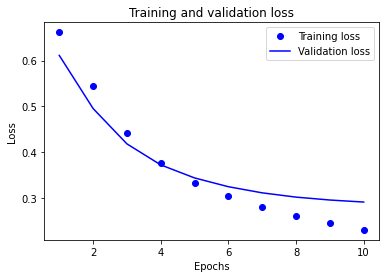

In [29]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

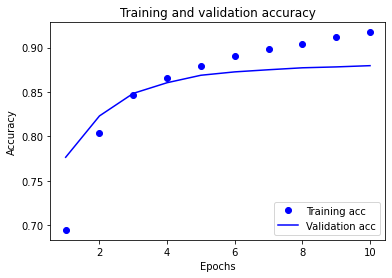

In [30]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In this plot, the dots represent the training loss and accuracy, and the solid lines are the validation loss and accuracy.

Notice the training loss *decreases* with each epoch and the training accuracy *increases* with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

This isn't the case for the validation loss and accuracy—they seem to peak before the training accuracy. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. After this point, the model over-optimizes and learns representations *specific* to the training data that do not *generalize* to test data.

For this particular case, you could prevent overfitting by simply stopping the training when the validation accuracy is no longer increasing. One way to do so is to use the `tf.keras.callbacks.EarlyStopping` callback.

## Export the model

In the code above, you applied the `TextVectorization` layer to the dataset before feeding text to the model. If you want to make your model capable of processing raw strings (for example, to simplify deploying it), you can include the `TextVectorization` layer inside your model. To do so, you can create a new model using the weights you just trained.

In [31]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

  1/782 [..............................] - ETA: 4:07 - loss: 0.2651 - accuracy: 0.9375

 10/782 [..............................] - ETA: 4s - loss: 0.3090 - accuracy: 0.8850  

 20/782 [..............................] - ETA: 4s - loss: 0.3122 - accuracy: 0.8797

 30/782 [>.............................] - ETA: 4s - loss: 0.3115 - accuracy: 0.8781

 40/782 [>.............................] - ETA: 4s - loss: 0.3114 - accuracy: 0.8770

 50/782 [>.............................] - ETA: 3s - loss: 0.3101 - accuracy: 0.8772

 60/782 [=>............................] - ETA: 3s - loss: 0.3089 - accuracy: 0.8774

 69/782 [=>............................] - ETA: 3s - loss: 0.3087 - accuracy: 0.8770

 79/782 [==>...........................] - ETA: 3s - loss: 0.3083 - accuracy: 0.8767

 89/782 [==>...........................] - ETA: 3s - loss: 0.3081 - accuracy: 0.8764

 99/782 [==>...........................] - ETA: 3s - loss: 0.3079 - accuracy: 0.8761

109/782 [===>..........................] - ETA: 3s - loss: 0.3078 - accuracy: 0.8760

119/782 [===>..........................] - ETA: 3s - loss: 0.3081 - accuracy: 0.8758

129/782 [===>..........................] - ETA: 3s - loss: 0.3083 - accuracy: 0.8756

139/782 [====>.........................] - ETA: 3s - loss: 0.3085 - accuracy: 0.8753

149/782 [====>.........................] - ETA: 3s - loss: 0.3088 - accuracy: 0.8750

159/782 [=====>........................] - ETA: 3s - loss: 0.3090 - accuracy: 0.8747

169/782 [=====>........................] - ETA: 3s - loss: 0.3092 - accuracy: 0.8745

179/782 [=====>........................] - ETA: 3s - loss: 0.3094 - accuracy: 0.8742

189/782 [======>.......................] - ETA: 3s - loss: 0.3096 - accuracy: 0.8740

199/782 [======>.......................] - ETA: 3s - loss: 0.3100 - accuracy: 0.8737

209/782 [=======>......................] - ETA: 3s - loss: 0.3103 - accuracy: 0.8734

219/782 [=======>......................] - ETA: 3s - loss: 0.3105 - accuracy: 0.8732

229/782 [=======>......................] - ETA: 2s - loss: 0.3107 - accuracy: 0.8730

239/782 [========>.....................] - ETA: 2s - loss: 0.3109 - accuracy: 0.8728

249/782 [========>.....................] - ETA: 2s - loss: 0.3110 - accuracy: 0.8726

259/782 [========>.....................] - ETA: 2s - loss: 0.3112 - accuracy: 0.8725

269/782 [=========>....................] - ETA: 2s - loss: 0.3113 - accuracy: 0.8723

279/782 [=========>....................] - ETA: 2s - loss: 0.3115 - accuracy: 0.8722

289/782 [==========>...................] - ETA: 2s - loss: 0.3117 - accuracy: 0.8721

299/782 [==========>...................] - ETA: 2s - loss: 0.3119 - accuracy: 0.8720

308/782 [==========>...................] - ETA: 2s - loss: 0.3120 - accuracy: 0.8719

318/782 [===========>..................] - ETA: 2s - loss: 0.3122 - accuracy: 0.8718

327/782 [===========>..................] - ETA: 2s - loss: 0.3123 - accuracy: 0.8717

337/782 [===========>..................] - ETA: 2s - loss: 0.3123 - accuracy: 0.8717

347/782 [============>.................] - ETA: 2s - loss: 0.3124 - accuracy: 0.8716

357/782 [============>.................] - ETA: 2s - loss: 0.3124 - accuracy: 0.8716

367/782 [=============>................] - ETA: 2s - loss: 0.3125 - accuracy: 0.8715

377/782 [=============>................] - ETA: 2s - loss: 0.3126 - accuracy: 0.8715

387/782 [=============>................] - ETA: 2s - loss: 0.3126 - accuracy: 0.8714

397/782 [==============>...............] - ETA: 2s - loss: 0.3127 - accuracy: 0.8714

407/782 [==============>...............] - ETA: 2s - loss: 0.3127 - accuracy: 0.8714

417/782 [==============>...............] - ETA: 1s - loss: 0.3127 - accuracy: 0.8713

427/782 [===============>..............] - ETA: 1s - loss: 0.3127 - accuracy: 0.8713

437/782 [===============>..............] - ETA: 1s - loss: 0.3128 - accuracy: 0.8713

447/782 [================>.............] - ETA: 1s - loss: 0.3128 - accuracy: 0.8713

457/782 [================>.............] - ETA: 1s - loss: 0.3128 - accuracy: 0.8712

467/782 [================>.............] - ETA: 1s - loss: 0.3128 - accuracy: 0.8712

477/782 [=================>............] - ETA: 1s - loss: 0.3128 - accuracy: 0.8712

487/782 [=================>............] - ETA: 1s - loss: 0.3128 - accuracy: 0.8712

497/782 [==================>...........] - ETA: 1s - loss: 0.3128 - accuracy: 0.8712

507/782 [==================>...........] - ETA: 1s - loss: 0.3128 - accuracy: 0.8712

517/782 [==================>...........] - ETA: 1s - loss: 0.3127 - accuracy: 0.8712

527/782 [===================>..........] - ETA: 1s - loss: 0.3127 - accuracy: 0.8711

536/782 [===================>..........] - ETA: 1s - loss: 0.3127 - accuracy: 0.8711

546/782 [===================>..........] - ETA: 1s - loss: 0.3127 - accuracy: 0.8711

556/782 [====================>.........] - ETA: 1s - loss: 0.3127 - accuracy: 0.8711

566/782 [====================>.........] - ETA: 1s - loss: 0.3127 - accuracy: 0.8712

576/782 [=====================>........] - ETA: 1s - loss: 0.3127 - accuracy: 0.8712

586/782 [=====================>........] - ETA: 1s - loss: 0.3127 - accuracy: 0.8712

596/782 [=====================>........] - ETA: 1s - loss: 0.3126 - accuracy: 0.8712

606/782 [======================>.......] - ETA: 0s - loss: 0.3126 - accuracy: 0.8712

616/782 [======================>.......] - ETA: 0s - loss: 0.3126 - accuracy: 0.8712

626/782 [=======================>......] - ETA: 0s - loss: 0.3125 - accuracy: 0.8713

636/782 [=======================>......] - ETA: 0s - loss: 0.3125 - accuracy: 0.8713

646/782 [=======================>......] - ETA: 0s - loss: 0.3125 - accuracy: 0.8713

656/782 [========================>.....] - ETA: 0s - loss: 0.3125 - accuracy: 0.8713

666/782 [========================>.....] - ETA: 0s - loss: 0.3124 - accuracy: 0.8713

676/782 [========================>.....] - ETA: 0s - loss: 0.3124 - accuracy: 0.8714

685/782 [=========================>....] - ETA: 0s - loss: 0.3124 - accuracy: 0.8714

695/782 [=========================>....] - ETA: 0s - loss: 0.3123 - accuracy: 0.8714

705/782 [==========================>...] - ETA: 0s - loss: 0.3123 - accuracy: 0.8714

715/782 [==========================>...] - ETA: 0s - loss: 0.3123 - accuracy: 0.8715

725/782 [==========================>...] - ETA: 0s - loss: 0.3122 - accuracy: 0.8715

735/782 [===========================>..] - ETA: 0s - loss: 0.3122 - accuracy: 0.8715

745/782 [===========================>..] - ETA: 0s - loss: 0.3122 - accuracy: 0.8715

755/782 [===========================>..] - ETA: 0s - loss: 0.3121 - accuracy: 0.8716

765/782 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8716

774/782 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8716

782/782 [==============================] - 5s 5ms/step - loss: 0.3121 - accuracy: 0.8716


0.873960018157959


### Inference on new data

To get predictions for new examples, you can simply call `model.predict()`.

In [32]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

array([[0.63023424],
       [0.4530166 ],
       [0.36852628]], dtype=float32)

Including the text preprocessing logic inside your model enables you to export a model for production that simplifies deployment, and reduces the potential for [train/test skew](https://developers.google.com/machine-learning/guides/rules-of-ml#training-serving_skew).

There is a performance difference to keep in mind when choosing where to apply your TextVectorization layer. Using it outside of your model enables you to do asynchronous CPU processing and buffering of your data when training on GPU. So, if you're training your model on the GPU, you probably want to go with this option to get the best performance while developing your model, then switch to including the TextVectorization layer inside your model when you're ready to prepare for deployment.

Visit this [tutorial](https://www.tensorflow.org/tutorials/keras/save_and_load) to learn more about saving models.

## Exercise: multiclass classification on Stack Overflow questions

This tutorial showed how to train a binary classifier from scratch on the IMDB dataset. As an exercise, you can modify this notebook to train a multiclass classifier to predict the tag of a programming question on [Stack Overflow](http://stackoverflow.com/).

We have prepared a [dataset](http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz) for you to use containing the body of several thousand programming questions (for example, "How can sort a dictionary by value in Python?") posted to Stack Overflow. Each of these is labeled with exactly one tag (either Python, CSharp, JavaScript, or Java). Your task is to take a question as input, and predict the appropriate tag, in this case, Python. 

The dataset you will work with contains several thousand questions extracted from the much larger public Stack Overflow dataset on [BigQuery](https://console.cloud.google.com/marketplace/details/stack-exchange/stack-overflow), which contains more than 17 million posts.

After downloading the dataset, you will find it has a similar directory structure to the IMDB dataset you worked with previously:

```
train/
...python/
......0.txt
......1.txt
...javascript/
......0.txt
......1.txt
...csharp/
......0.txt
......1.txt
...java/
......0.txt
......1.txt
```

Note: to increase the difficulty of the classification problem, we have replaced any occurences of the words Python, CSharp, JavaScript, or Java in the programming questions with the word *blank* (as many questions contain the language they're about). 

To complete this exercise, you should modify this notebook to work with the Stack Overflow dataset by making the following modifications:

1. At the top of your notebook, update the code that downloads the IMDB dataset with code to download the [Stack Overflow dataset](http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz) we have prepreared. As the Stack Overflow dataset has a similar directory structure, you will not need to make many modifications. 

1. Modify the last layer of your model to read `Dense(4)`, as there are now four output classes.

1. When you compile your model, change the loss to `losses.SparseCategoricalCrossentropy`. This is the correct loss function to use for a multiclass classification problem, when the labels for each class are integers (in our case, they can be 0, *1*, *2*, or *3*).

1. Once these changes are complete, you will be able to train a multiclass classifier. 

If you get stuck, you can find a solution [here](https://github.com/tensorflow/examples/blob/master/community/en/text_classification_solution.ipynb).


## Learning more

This tutorial introduced text classification from scratch. To learn more about the text classification workflow in general, we recommend reading [this guide](https://developers.google.com/machine-learning/guides/text-classification/) from Google Developers.
